## Introduction

In this project, I conducted an Exploratory Data Analysis (EDA) and visualization using Python, leveraging libraries such as Pandas, Matplotlib, and Seaborn. The primary goal of this analysis was to demonstrate my ability to prepare and explore a dataset, identifying patterns, anomalies, and basic correlations.

The dataset used in this analysis contains [crime records in Argentina](https://www.argentina.gob.ar/seguridad/estadisticascriminales/bases-de-datos).

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/Data_Science/snic-provincias.csv'
df = pd.read_csv(file_path, delimiter=';')

## Data Cleaning

In [4]:
df.head()

,provincia_id,provincia_nombre,anio,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas,cantidad_victimas_masc,cantidad_victimas_fem,cantidad_victimas_sd,tasa_hechos,tasa_victimas,tasa_victimas_masc,tasa_victimas_fem
0,2,Ciudad Autónoma de Buenos Aires,2000,1,Homicidios dolosos,149,158.0,121.0,37.0,0.0,"4,9750013","5,2755051","8,8257008","2,2783601"
1,2,Ciudad Autónoma de Buenos Aires,2000,2,Homicidios dolosos en grado de tentativa,54,58.0,40.0,18.0,0.0,"1,8030207","1,9365778","2,9175868","1,1083914"
2,2,Ciudad Autónoma de Buenos Aires,2000,3,Muertes en accidentes viales,121,126.0,97.0,29.0,0.0,"4,040102","4,2070484","7,0751481","1,7857418"
3,2,Ciudad Autónoma de Buenos Aires,2000,4,Homicidios culposos por otros hechos,35,36.0,20.0,13.0,3.0,"1,1686245","1,2020137","1,4587934",",80050492"
4,2,Ciudad Autónoma de Buenos Aires,2000,5,Lesiones dolosas,13154,13732.0,8105.0,5485.0,142.0,"439,20248","458,50146","591,17603","337,7515"


In [5]:
df.dtypes

provincia_id                   int64
provincia_nombre              object
anio                           int64
codigo_delito_snic_id         object
codigo_delito_snic_nombre     object
cantidad_hechos                int64
cantidad_victimas            float64
cantidad_victimas_masc       float64
cantidad_victimas_fem        float64
cantidad_victimas_sd         float64
tasa_hechos                   object
tasa_victimas                 object
tasa_victimas_masc            object
tasa_victimas_fem             object
dtype: object

In [6]:
# Convert columns types
columns_to_convert = ['tasa_hechos', 'tasa_victimas', 'tasa_victimas_masc', 'tasa_victimas_fem']
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True).astype(float)


In [7]:
df.isnull().sum()

provincia_id                     0
provincia_nombre                 0
anio                             0
codigo_delito_snic_id            0
codigo_delito_snic_nombre        0
cantidad_hechos                  0
cantidad_victimas            13736
cantidad_victimas_masc       13736
cantidad_victimas_fem        13736
cantidad_victimas_sd         13736
tasa_hechos                      0
tasa_victimas                13736
tasa_victimas_masc           13736
tasa_victimas_fem            13736
dtype: int64

In [8]:
# Null values indicate that no victims were reported
df.fillna(0, inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,provincia_id,anio,cantidad_hechos,cantidad_victimas,cantidad_victimas_masc,cantidad_victimas_fem,cantidad_victimas_sd,tasa_hechos,tasa_victimas,tasa_victimas_masc,tasa_victimas_fem
count,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000
mean,48.008996,2012.676162,1696.281906,360.784576,151.616426,126.980369,82.188296,112.732050,22.634166,18.984849,16.972977
std,27.685422,6.873185,6509.622936,2348.262502,1127.747416,977.009333,1023.886782,290.266994,91.368326,87.456422,80.992137
min,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2007.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.692565,0.000000,0.000000,0.000000
50%,48.000000,2014.000000,80.000000,0.000000,0.000000,0.000000,0.000000,9.279966,0.000000,0.000000,0.000000
75%,71.000000,2019.000000,638.250000,29.000000,2.000000,1.000000,0.000000,59.854056,3.944853,0.557543,0.400815
max,94.000000,2022.000000,143840.000000,68450.000000,29567.000000,41317.000000,61164.000000,6707.523400,1232.819800,1476.951500,1462.505000


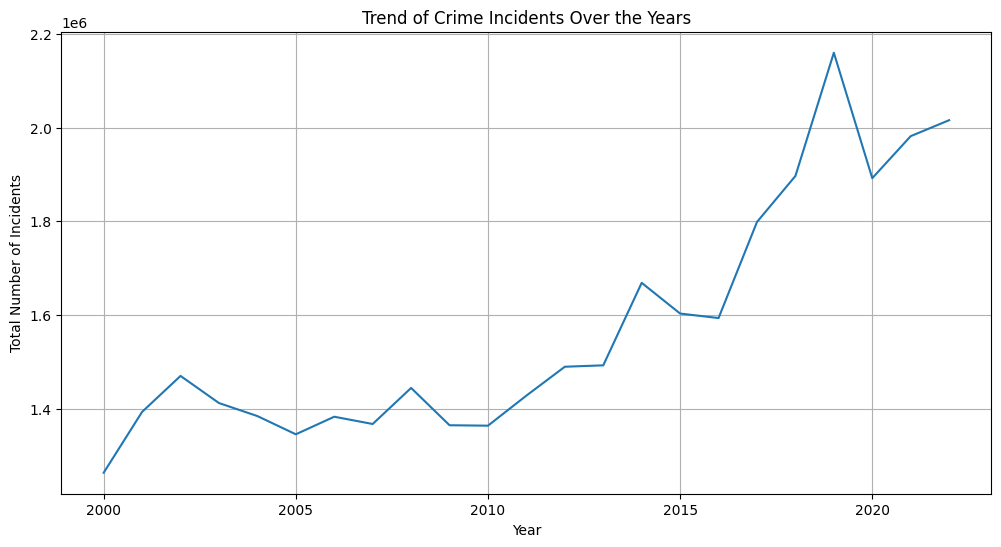

In [11]:
crimes_over_time = df.groupby('anio')['cantidad_hechos'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=crimes_over_time, x='anio', y='cantidad_hechos')
plt.title('Trend of Crime Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.grid(True)
plt.show()



> As seen in the graph, crime rates in Argentina have shown a consistent increase over time, with a brief period of reduction during the pandemic.



<ipython-input-12-ede04ef31d68>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='codigo_delito_snic_nombre', y='cantidad_hechos', data=top_5_crimes_df, palette='Blues_d')


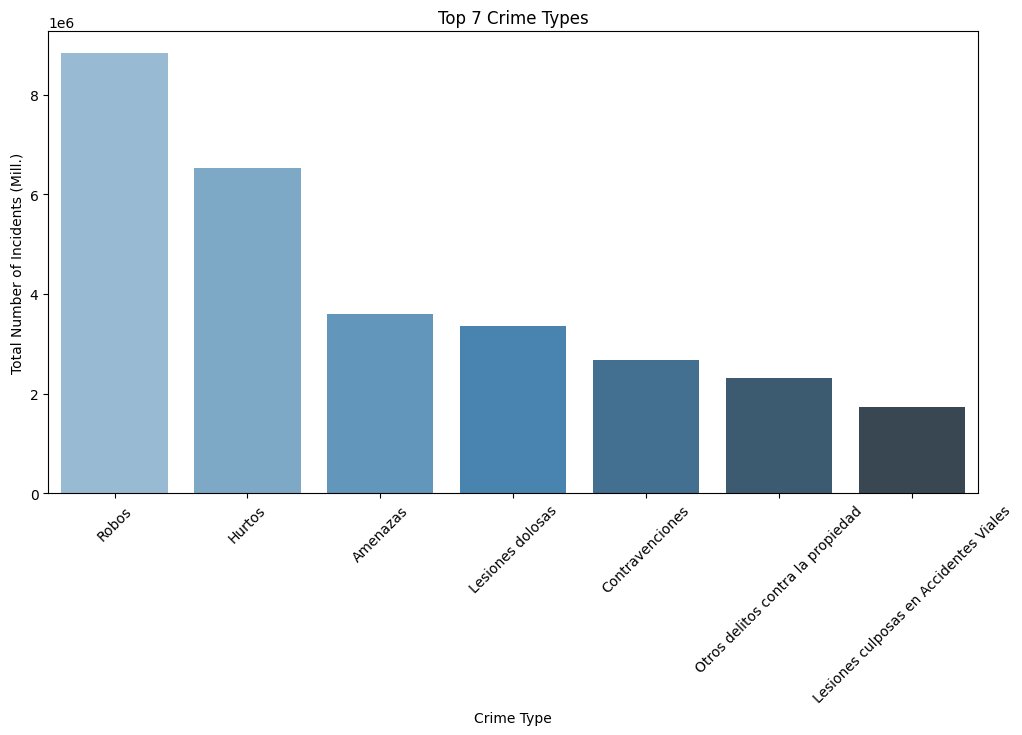

In [12]:
df['codigo_delito_snic_nombre'] = df['codigo_delito_snic_nombre'].replace('Robos (excluye los agravados por el resultado de lesiones y/o muertes)', 'Robos')

top_5_crimes = df.groupby('codigo_delito_snic_nombre')['cantidad_hechos'].sum().sort_values(ascending=False).nlargest(7)

top_5_crimes_df = top_5_crimes.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='codigo_delito_snic_nombre', y='cantidad_hechos', data=top_5_crimes_df, palette='Blues_d')
plt.title('Top 7 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Incidents (Mill.)')
plt.xticks(rotation=45)
plt.show()




> The 7 most prevalent crimes over time for the country, in order, are as follows: Robbery, Theft, Threats, Intentional injuries, Offenses, Other property crimes, and Negligent injuries in traffic accidents.



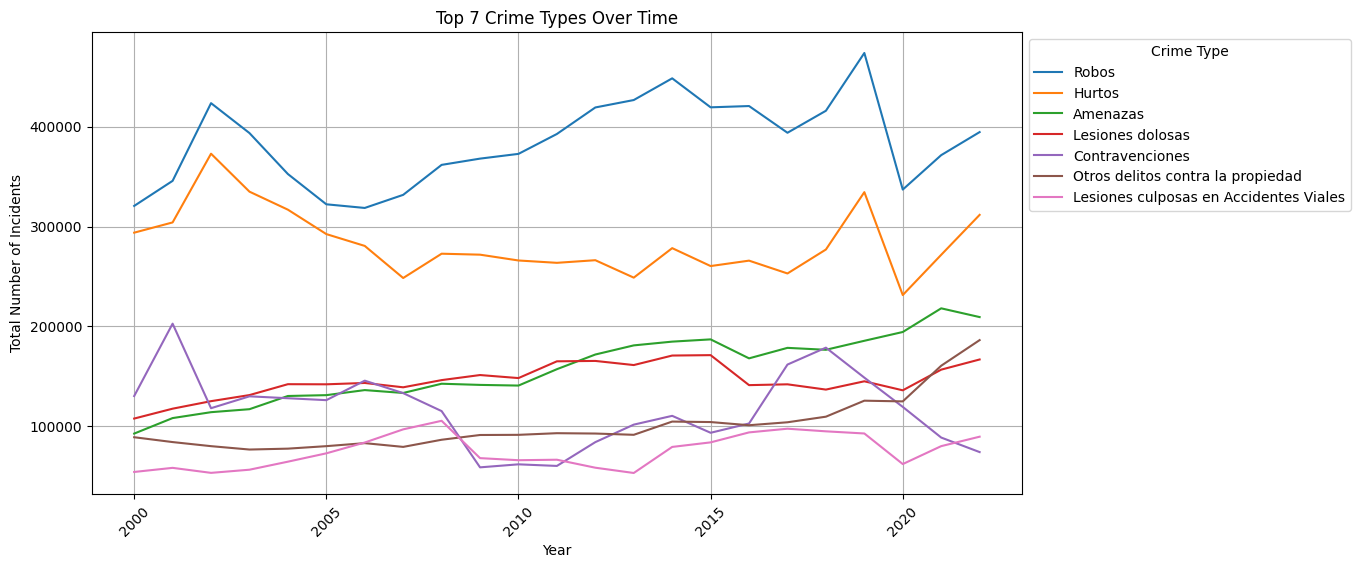

In [13]:
# Filter the original DataFrame to include only the top 7 crimes and group by year and crime type
top_7_crimes = df.groupby('codigo_delito_snic_nombre')['cantidad_hechos'].sum().sort_values(ascending=False).nlargest(7)
grouped_df = df[df['codigo_delito_snic_nombre'].isin(top_7_crimes.index)].groupby(['anio', 'codigo_delito_snic_nombre'])['cantidad_hechos'].sum().unstack()

# Reorder the columns of grouped_df based on total number of incidents
grouped_df = grouped_df[top_7_crimes.index]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, dashes=False)
plt.title('Top 7 Crime Types Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

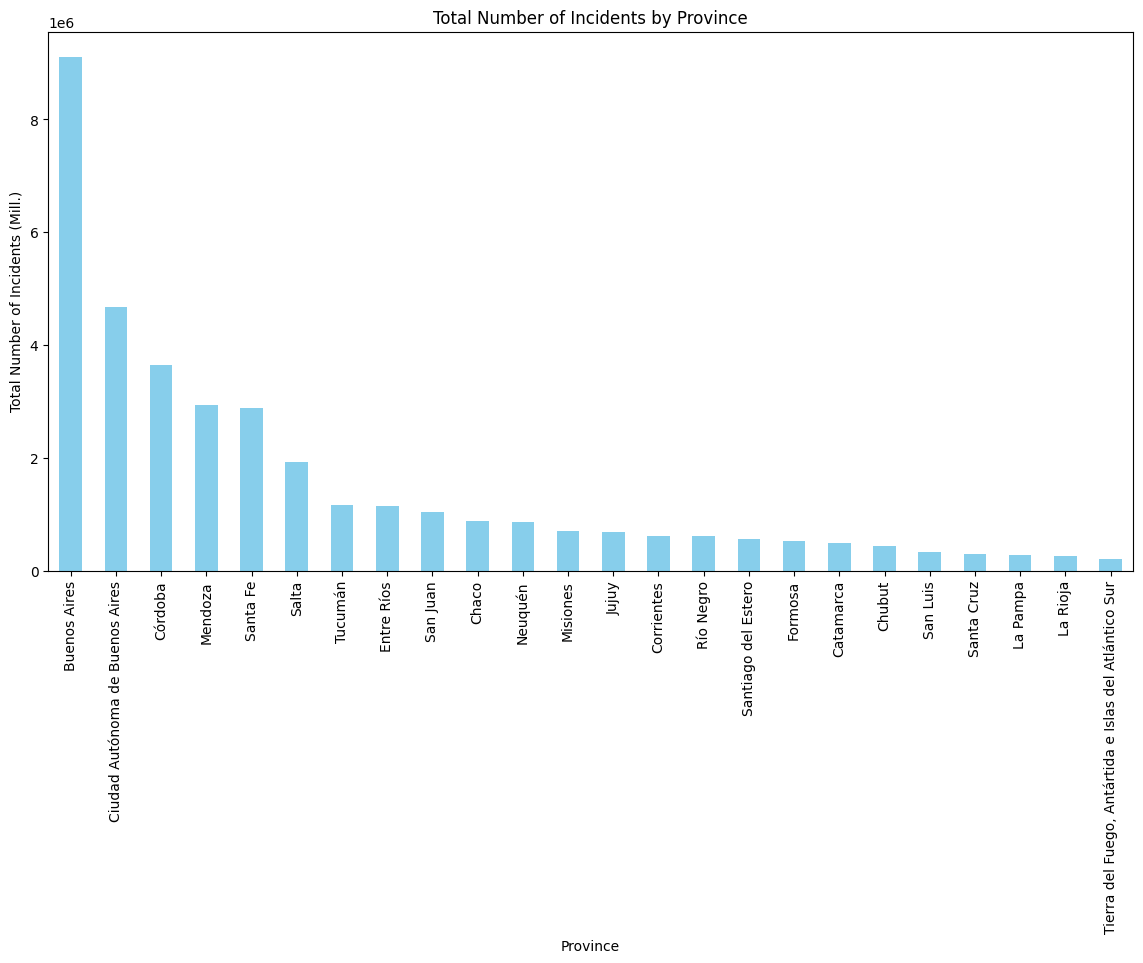

In [14]:
crimes_by_province = df.groupby('provincia_nombre')['cantidad_hechos'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
crimes_by_province.plot(kind='bar', color='skyblue')
plt.title('Total Number of Incidents by Province')
plt.xlabel('Province')
plt.ylabel('Total Number of Incidents (Mill.)')
plt.xticks(rotation=90)
plt.show()

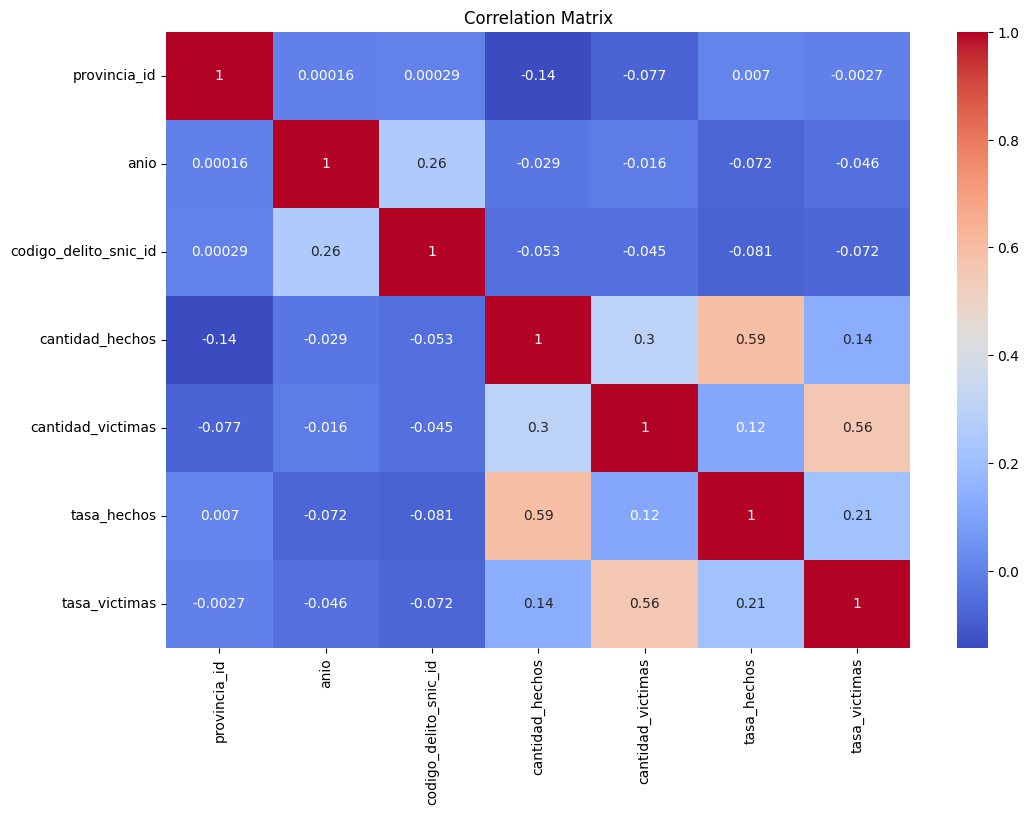

In [15]:
int_columns = ['provincia_id', 'anio', 'codigo_delito_snic_id', 'cantidad_hechos', 'cantidad_victimas', 'tasa_hechos', 'tasa_victimas']
filtered_df = df[int_columns]

# Calc correlation matrix
corr_matrix = filtered_df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



> The correlation matrix did not reveal any significant correlations between the variables. The only noticeable correlations were expected, such as the correlation between the number of incidents and the incident rates, which are inherently related since the rates are calculated based on the number of incidents.



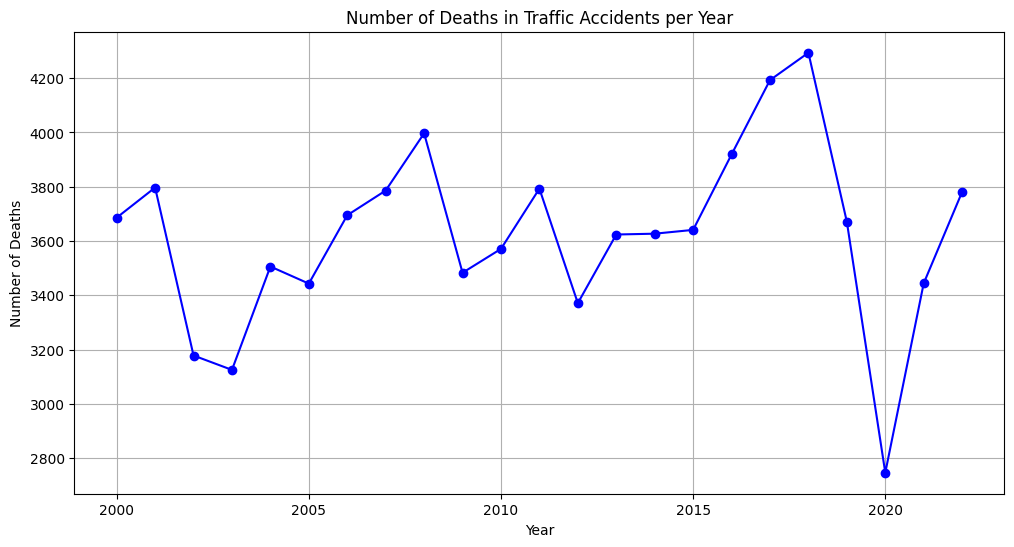

In [16]:
# Filter the DataFrame to include only rows for deaths in traffic accidents
accidentes_viales = df[df['codigo_delito_snic_nombre'] == 'Muertes en accidentes viales']

# Group the data by year and sum the number of incidents
muertes_por_ano = accidentes_viales.groupby('anio')['cantidad_hechos'].sum()

# Create a line plot to visualize the number of deaths in traffic accidents over time
muertes_por_ano.plot(kind='line', figsize=(12, 6), marker='o', color='b')
plt.title('Number of Deaths in Traffic Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()




> The yearly trend of deaths in traffic accidents showed the critical need for improved road safety measures. It can be observed that at the beginning of the COVID-19 pandemic, the number of deaths in traffic accidents decreased significantly due to reduced circulation.





---



It is important to calculate crime rates by population proportion because regions with larger populations are likely to have higher absolute numbers of incidents. By normalizing the data, we can make meaningful comparisons between provinces regardless of their population sizes:



In [17]:
# Add to the original dataframe the approximate population by province
data = {
    'provincia_nombre': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos',
                  'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro',
                  'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Tucumán'],
    'Población': [17500000, 3100000, 400000, 1300000, 600000, 4300000, 1200000, 1400000,
                  650000, 800000, 400000, 400000, 2000000, 1200000, 1100000, 800000,
                  1700000, 800000, 500000, 300000, 3500000, 1100000, 200000, 1600000]
}

df_poblacion = pd.DataFrame(data)

df_merged = df.merge(df_poblacion, how='left', left_on='provincia_nombre', right_on='provincia_nombre')

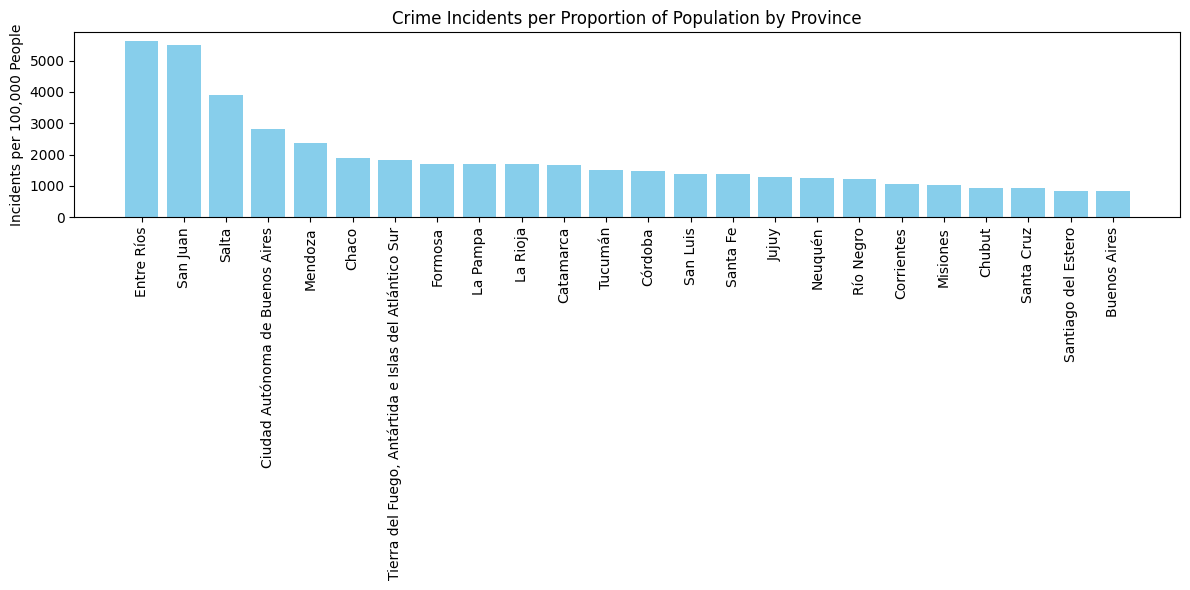

In [18]:
plt.figure(figsize=(12, 6))

# Calculate the proportion of incidents per population
df_merged['Incidents per 100,000 People'] = (df_merged['cantidad_hechos'] / df_merged['Población']) * 100000

# Sort the DataFrame by the proportion of incidents per inhabitant
df_merged_sorted = df_merged.sort_values('Incidents per 100,000 People', ascending=False)

# Create the bar chart
plt.bar(df_merged_sorted['provincia_nombre'], df_merged_sorted['Incidents per 100,000 People'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Incidents per 100,000 People')
plt.title('Crime Incidents per Proportion of Population by Province')

# Show the chart
plt.tight_layout()
plt.show()

## Conclusions

Overall, this EDA provided valuable insights into the crime landscape in Argentina and demonstrated the importance of data cleaning, exploration, and visualization in uncovering meaningful patterns and relationships.